In [6]:
import numpy as np

# from pyspark import SparkContext
# sc = SparkContext()
# from pyspark.sql import SQLContext
# spark = SQLContext(sc)

from pyspark.sql.types import *
from pyspark.sql import Row

In [8]:
def _create_df():
    schema = StructType([
        StructField('name', StringType()),
        StructField('age', FloatType()),
        StructField('salary', FloatType())
    ])

    rows = [
        Row(name='alada', age=12.0, salary=1000.0),
        Row(name='bladb', age=13.0, salary=2000.0),
        Row(name='clabc', age=11.0, salary=1500.0),
    ]
    df = spark.createDataFrame(rows, schema)
    return df

In [13]:
def get_describe_all(temp_df):
    a = np.array(temp_df.describe().collect())
    a = a[:, 2:].astype(float) # remove ISDN
    return a

def get_describe_clusters(df, k):
    describe_clusters = []
    for i in range(k):
        # select df columns :-2 to remove features and prediction column
        temp_df = df.select(df.columns[:-2]).where(df.prediction == i)
        a = get_describe_all(temp_df)
        describe_clusters.append(a)
    return describe_clusters

In [33]:
def _standard_scale(df, describe_all):
    number_of_features = describe_all.shape[1]
    means = describe_all[1]
    stds  = describe_all[2]
    columns = df.columns
    
    for i in range(number_of_features):
        df = df.withColumn(columns[i+1], (df[columns[i+1]] - means[i]) / stds[i] )
    return df


In [34]:
df = _create_df()
df.show()
df.describe().show()

+-----+----+------+
| name| age|salary|
+-----+----+------+
|alada|12.0|1000.0|
|bladb|13.0|2000.0|
|clabc|11.0|1500.0|
+-----+----+------+

+-------+-----+----+------+
|summary| name| age|salary|
+-------+-----+----+------+
|  count|    3|   3|     3|
|   mean| null|12.0|1500.0|
| stddev| null| 1.0| 500.0|
|    min|alada|11.0|1000.0|
|    max|clabc|13.0|2000.0|
+-------+-----+----+------+



In [35]:
describe_all = get_describe_all(df)
print(describe_all)

[[3.0e+00 3.0e+00]
 [1.2e+01 1.5e+03]
 [1.0e+00 5.0e+02]
 [1.1e+01 1.0e+03]
 [1.3e+01 2.0e+03]]


In [36]:
scaled_df = _standard_scale(df, describe_all)

In [37]:
df.show()

+-----+----+------+
| name| age|salary|
+-----+----+------+
|alada|12.0|1000.0|
|bladb|13.0|2000.0|
|clabc|11.0|1500.0|
+-----+----+------+



In [38]:
scaled_df.show()

+-----+----+------+
| name| age|salary|
+-----+----+------+
|alada| 0.0|  -1.0|
|bladb| 1.0|   1.0|
|clabc|-1.0|   0.0|
+-----+----+------+



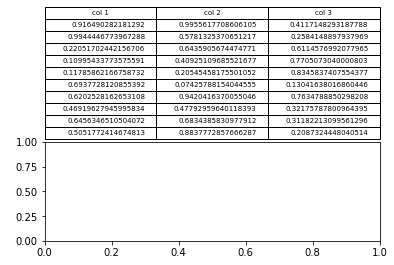

In [41]:
import numpy as np
import matplotlib.pyplot as plt


fig, axs =plt.subplots(2,1)
clust_data = np.random.random((10,3))
collabel=("col 1", "col 2", "col 3")
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=clust_data,colLabels=collabel,loc='center')
plt.show()